# Binary Inference a la Dan Foreman-Mackey
## Kevin Gullikson
### Tex-Mex, November ??, 2015

# Basic Idea

 - We have a bunch of RV and/or imaging data ($\{x_k\}$) on some sample of binary stars
 - We want to know the distribution of the orbital parameters ($q, a, e$)

# It's Really Easy!

$$ p(\{x_k\} | \theta) = p(\{x_k\} | \alpha) \exp\left(- \int Q_c(\omega) \Gamma_{\theta}(\omega) d\omega \right) \prod_{k=1}^K \frac{1}{N_k} \sum_{n=1}^{N_k} \frac{Q_c(\omega_k^{(n)}) \Gamma_{\theta}(\omega_k^{(n)})}{p(\omega_k^{(n)} | \alpha)} $$

<img src="http://minimemes.net/wp-content/uploads/2013/06/reaction_guy.jpg" >

# Back Up...

# Say you have a bunch of samples of... something

<img src="TexMex_Figures/Gaussian_Samples.png">

$$ L(\{x_k\}|\mu, \sigma) = \prod_K \frac{1}{\sqrt{2\pi\sigma^2}} e^{-0.5\frac{(x_k - \mu)^2}{\sigma^2}} $$

# Slightly more generalized

$$L(\{x_k\}|\theta) = \prod_k p(x_k|\theta) $$

## Now compare:

$$ p(\{x_k\} | \theta) = p(\{x_k\} | \alpha) \exp\left(- \int Q_c(\omega) \Gamma_{\theta}(\omega) d\omega \right) \prod_{k=1}^K \frac{1}{N_k} \sum_{n=1}^{N_k} \frac{Q_c(\omega_k^{(n)}) \Gamma_{\theta}(\omega_k^{(n)})}{p(\omega_k^{(n)} | \alpha)} $$

$$\Gamma_{\theta}(\omega) = N p(\omega | \theta) $$

# First Step: Fit orbits

 - Each star has some set of data, and a bunch of orbits consistent with the data.
 
   $$p(\omega_k|x_k, \alpha) = \frac{p(x_k|\omega_k)p(\omega_k|\alpha)}{p(x_k|\alpha)} $$
  
    - $x_k$ is the set of radial velocity and imaging data for star k
    - $\omega_k$ is the set of orbital parameters for star k. $\omega_k = (a, M_0, e, \omega, K_1, q, \Delta v)$ for only spectroscopic data
    - $\alpha$ is just notation for the priors you set on the orbital elements.

<img src="Figures/with_qprior.png">

## Orbit Priors:

  - a: log-uniform from $10^{-2} - 10^6$ AU
  - M_0, \omega: Both uniform from $0 - 360^{\circ}$
  - e: log-uniform from $10^{-20} - 0$
  - $K_1$ (RV semi-amplitude of the primary star): log-uniform from $10^{-3} - 10^3$ km/s
  - $\Delta v$ (the system velocity): Uniform from $-20 - 20$ km/s. This is 0 for all simulated stars.
  - q: Use the companion temperature information, assume main-sequence. Sample the errors and use kernel density estimation.
  
  <img src="Figures/qprior.png">

# Second Step: Fit Distributions


$$ p(\{x_k\} | \theta) = p(\{x_k\} | \alpha) \exp\left(- \int Q_c(\omega) \Gamma_{\theta}(\omega) d\omega \right) \prod_{k=1}^K \frac{1}{N_k} \sum_{n=1}^{N_k} \frac{Q_c(\omega_k^{(n)}) \Gamma_{\theta}(\omega_k^{(n)})}{p(\omega_k^{(n)} | \alpha)} $$

- $\Gamma_{\theta}(\omega) = \Gamma(a, e, q | \gamma, \mu, \sigma, \eta) = N p(q|\gamma) p(a|\mu, \sigma) p(e|\eta) $
    - $p(q|\gamma) = (1-\gamma)q^{-\gamma} $
    - $p(a|\mu, \sigma) = \frac{1}{a\sqrt{2\pi\sigma^2}} e^{-0.5(\ln{a} - \mu)^2 / \sigma^2} $
    - $p(e|\eta) = (1-\eta)e^{-\eta} $
- $Q(\omega)$ is the completeness for parameter set $\omega$:

$$Q(q) = \frac{1}{1+e^{-\alpha(q-\beta)}}  $$

  Looks like:

<img src="Figures/Completeness.png">


In [41]:
from IPython.display import HTML
HTML(filename='TexMex_Figures/Sample_Table.html')

,Name,$M_0$,$\log{K_1}$,$\log{a}$,$\log{e}$,$\omega$,dv1,q
0,$\omega_k^{(0)}$,286.615180,-2.788812,2.274059,-12.970221,152.518320,-0.267150,0.501120
1,$\omega_k^{(1)}$,307.931194,-2.065090,0.000915,-15.206329,352.325391,-0.084419,0.898791
2,$\omega_k^{(2)}$,349.979716,-2.657806,6.340732,-7.301358,5.977844,-0.032327,0.948057
3,$\omega_k^{(3)}$,217.449312,-2.812814,1.454800,-4.731301,217.877884,-0.175958,0.728021
4,$\omega_k^{(4)}$,185.414098,-2.283661,-0.753462,-19.955255,123.024411,-0.037122,0.893841


# Simulation Results

# No Biasing or Censoring, well-constrained orbits

<img src='Figures/Triangle_well_constrained.png'>

# No Bias, No Censoring, Unconstrained Orbits

<img src='Figures/Triangle_unconstrained.png'>

# Censored Data, No Bias

<img src='Figures/Triangle_soft_censor.png' >

# Malmquist-Biased Sample #

$$ P(q|obs, \gamma) = \frac{P(obs|q)P(q| \gamma)}{\int_0^1 P(obs|q)P(q| \gamma)dq} $$

I am parameterizing $P(obs|q)$ and $P(q| \gamma)$ as:

$$
\begin{align}
P(obs|q) &= a + bq + cq^2 + dq^3 + eq^4 + fq^5 \\
P(q| \gamma) &= (1-\gamma)q^{-\gamma}
\end{align}
$$

<img src='Figures/Malmquist_Pobs.png' >

<img src="Figures/Malmquist.png">

<img src='Figures/Triangle_malmquist.png'>

# Fitting for the Binary Fraction
- So far, I have been assuming that every observed star is a binary, and I sometimes just don't detect it.
- In reality, some (many) of the sample stars have no companion.

<img src='TexMex_Figures/Triangle_fbin_fit.png'>

## Including Malmquist bias...
<img src='Figures/Triangle_malmquist_fbin_fit.png'>

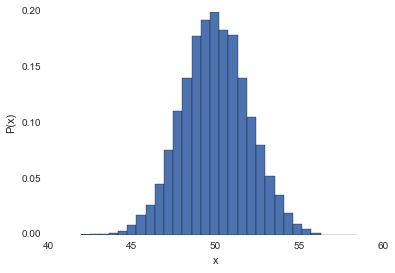

In [9]:
import numpy as np
mu, sigma = 50, 2
N = 10000
samples = np.random.normal(mu, sigma, size=N)
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from HelperFunctions import BinomialErrors

_, bins, _ = plt.hist(samples, bins=30, normed=True)
plt.xlabel('x')
plt.ylabel('P(x)')
plt.savefig('TexMex_Figures/Gaussian_Samples.png')

In [39]:
import h5py
import pandas as pd
with h5py.File('Simulation_Data.h5', 'r') as f:
    #print(f[u'unconstrained_mn_malmquist'].keys())
    dataset = f[u'unconstrained_mn_malmquist']['ds99']
    df = pd.DataFrame(data=dataset.value, columns=dataset.attrs['df_columns'])

df.rename(columns={'$\log{e}': '$\log{e}$'}, inplace=True)
df_head = df[[u'$M_0$', u'$\log{K_1}$', u'$\log{a}$', u'$\log{e}$', u'$\omega$',
       u'dv1', u'q']].head()
df_head['Name'] = ['$\omega_k^{(0)}$', '$\omega_k^{(1)}$', '$\omega_k^{(2)}$', '$\omega_k^{(3)}$', '$\omega_k^{(4)}$', ]
html_text = df_head[['Name', u'$M_0$', u'$\log{K_1}$', u'$\log{a}$', u'$\log{e}$', u'$\omega$',
       u'dv1', u'q']].to_html()
with open('TexMex_Figures/Sample_Table.html', 'w') as f:
    f.write(html_text)


In [25]:
html_df = df.head().to_html()

In [40]:
from IPython.display import HTML
HTML(filename='TexMex_Figures/Sample_Table.html')

,Name,$M_0$,$\log{K_1}$,$\log{a}$,$\log{e}$,$\omega$,dv1,q
0,$\omega_k^{(0)}$,286.615180,-2.788812,2.274059,-12.970221,152.518320,-0.267150,0.501120
1,$\omega_k^{(1)}$,307.931194,-2.065090,0.000915,-15.206329,352.325391,-0.084419,0.898791
2,$\omega_k^{(2)}$,349.979716,-2.657806,6.340732,-7.301358,5.977844,-0.032327,0.948057
3,$\omega_k^{(3)}$,217.449312,-2.812814,1.454800,-4.731301,217.877884,-0.175958,0.728021
4,$\omega_k^{(4)}$,185.414098,-2.283661,-0.753462,-19.955255,123.024411,-0.037122,0.893841


In [28]:
out.filename